# 제32회 ADP 실기 대비 - 핵심만 요약한 통계와 머신러닝 파이썬 코드북

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 설정

# Colab 한글 폰트 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# plt.rcParams['font.family'] = 'NanumBarunGothic'

# 11장. 모델 평가 지표와 거리 지표

## 11-1. 회귀모델 평가 지표

### ME (Mean Error)
- 실제값과 예측값의 차이를 평균 계산한 것이다.

### MAE (Mean Absolute Error)
- 실제값과 예측값의 차이를 절댓값으로 변환해 평균을 계산한 것이다.
- MAE는 에러에 절댓값을 취하기 때문에 에러의 크기 그대로 반영한다.
- 에러에 따른 손실이 선형적으로 올라가야 하거나 이상치가 많을 때 적합하다.
- MAE는 이상치의 영향을 상대적으로 줄여주는 평가 지표이다.
- 하나의 대푯값으로 예측할 때 MAE를 최소화하는 예측값은 중앙값이다.
- 지표가 직관적이며 예측변수와 단위가 같아 이해가 쉽다.
- 기온을 예측하는 모델의 MAE가 3이라면 이 모델은 평균적으로 3도 정도를 잘못 예측하는 것이다.

- 반면, 잔차에 절댓값을 씌우기 때문에 실제 값에 대해 과소예측(Under-estimates)인지 과대예측(Over-estimates)인지 파악하기 힘들다.
- 예를 들어, 삼성전자의 주가를 예측하는 모델의 MAE가 1000이라면, 이 모델이 평균적으로 주가를 1000원을 높게 예측하는지 1000원을 낮게 예측하는지 파악하기 힘들다.
- 또한, 스케일에 의존적이다. 이는 MAE, MSE, RMSE가 동일하게 가지는 단점이다.
- 예를 들어, 비트코인의 가격이 35,000,000원이고 이더리움의 가격이 1,000,000원 일때 두 암호화폐의 가격을 예측하는 모델의 MAE가 동일하게 10,000이라고 해보자. 이들은 분명 동일한 에러율이 아님에도 불구하고 MAE 숫자 자체는 동일하다.
- sklearn.metrics.mean_absolute_error(y_true, y_pred,)

### MAPE (Mean Absolute Percentage Error)
- MAE를 퍼센트로 변환한 것이다.
- 예측값 대비 잔차의 비율을 의미하며, 주로 다른 시계열 모형의 적합치를 비교하는 데 사용한다.
- 값이 작을수록 적합도가 높다는 것을 의미한다.
- 이 지표의 장점은 이해하기 쉽다는 것이다. 예를 들어, 공연석의 규모를 예측하는 모델의 MAPE가 3인 경우 실제 공연석의 예매량과 예측 예매량 비율이 3% 정도 차이난다고 해석할 수 있다.
- 또한, 비율 변수이기 때문에 모델 간 성능을 비교하기 용이하다. 예를 들어, 비트코인의 가격을 예측하는 모델의 MAPE가 3이고 이더리움의 가격을 예측하는 모델의 MAPE가5일 때 MAPE를 기반으로 판단하여 비트코인의 가격을 예측하는 모델이 더 우수하다고 평가할 수 있다. 

- 반면, 실제 값에 대해 과대예측 혹은 과소예측 여부를 파악하기 힘들다는 단점이 있다.
- 또한, 비율로 해석할 때 의미가 있는 값에만 적용할 수 있다. 예를 들어, 기온을 예측하는 모델의 경우 MAPE로의 해석이 유효하지 않다.
- 게다가 실제 값이 0이 포함될 경우 MAPE를 계산할 수 없다. 예를 들어, 10분 간격으로 서울시의 버스 수요를 예측해본다고 해보자.
    - 이 때 10분의 interval 동안 수요가 0인 구간이 존재한다면 MAPE는 zero-division error를 반환한다.
- 마지막으로, 실제 정답이 0에 가까운 매우 작은 값인 경우 MAPE 값이 매우 커질 수 있다는 단점이 있다.
- sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred, )
- np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### MPE (Mean Percentage Error)
- MAPE에서 절댓값을 제외한 지표이다.
- ME와 MAE가 척도 문제를 가지고 있는 반면, MPE와 MAPE는 0~100%로 표준화를 해서 척도 문제가 없다는 장점이 있다.
- 값이 0에 근접할수록 시계열 예측 모델이 잘 적합 되었다고 평가할 수 있고, MAE의 부호로 과대 혹은 과소 예측의 방향을 파악할 수 있다.
- 또한, 실제 값에 대해 과소, 과대 예측 여부를 파악할 수 있다. MPE가 양수이면 과소 예측, 음수이면 과대 예측이다.
- 단점은 지표 자체가 직관적이지 않으며 예측변수와 단위가 다르다는 것이다.

### MSE (Mean Squared Error)
- MSE는 실제값과 예측값의 차이를 제곱해 평균을 계산한 것이다.
- 장점은 지표 자체가 직관적이라는 것인 반면, 예측 변수와 단위가 다르며, 스케일에 의존적이라는 단점이 있다.
- 또한, 잔차를 제곱하기 때문에 이상치에 민감하며, 1 미만의 에러는 더 작아지고 그 이상의 에러는 더 커진다.
- 마지막으로 실제 값에 대해 과소, 과대 예측 여부를 알 수 없다.
- sklearn.metrics.mean_squared_error(y_true, y_pred, )

### RMSE (Root mean squared error)
- 잔차의 제곱에 대한 평균 값에 루트를 씌운 것이다.
- MSE값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 쓴다.
- RMSE 값을 최소화 했을 때의 결과가 최대가능도 방법의 결과와 같아지는 등 통계학적으로 큰 의미를 가지는 평가지표이다.
- 지표 자체가 직관적이며 예측 변수와 단위가 같다는 장점을 가진다.
- 또한, 제곱된 잔차를 다시 루트로 풀어주기 때문에 잔차를 제곱해서 생기는 값의 왜곡이 MSE에 비해 좀 덜하다.
- 반면, 이상치의 영향을 받기 쉬우므로 이상치를 제외한 처리 등을 미리 해두지 않으면 이상치에 과적합한 모델을 만들 가능성이 있다.
- 또한, 실제 값에 대해 과소, 과대 예측 여부를 파악하기 힘들다. 마지막으로 스케일에 의존적이다.
- np.sqrt(MSE)
- statsmodels.tools.eval_measures.rmse(y_true, y_pred, )

### $R^2$ (= Explained Variance Score)
- 결정계수를 말하며, 데이터에 대한 설명력을 0~1로 나타낸다.
- sklearn.metrics.r2_score(y_true, y_pred, )
- sklearn.metrics.explained_variance_score(y_true, y_pred, )

### MSLE (Mean Squared Log Error)
- MSE에 로그를 적용한 지표이다.
- sklearn.metrics.mean_squared_log_error(y_true, y_pred, )

### RMSLE (Root Mean Squared Log Error)
- 실제값과 예측값의 로그를 각각 취한 후 그 차의 제곱평균제곱근으로 계산되는 지표이다.
- RMSE를 최소화하면 RMSLE가 최소화 된다.

### AIC (Akaike's Information Criterion)
- 서로 다른 선형 회귀 모형의 성능을 비교할 때 사용한다.
- 조정 결정 계수 (Adjusted $R^2$)와 함께 최대 가능도에 독립변수의 개수에 대한 손실(Penalty)을 반영하는 방법을 정보량 규준이라고 하며 손실 가중치의 계산법에 따라 AIC, BIC 두 가지를 사용한다.
- AIC는 모형과 데이터의 확률 분포 사이의 kullback-Leibler 수준을 가장 크게 하기 위한 시도에서 나왔다. 값이 적을 수록 올바른 모형에 가깝다.
- p는 설명변수의 개수, n은 데이터의 개수, $log{L_i}$는 최대로그가능도를 말한다.
- $-2log{L_i} + 2 * (p+1) - 2$로 구한다. (절편이 있는 경우 p+1, 없으면 p)
- statsmodels.tools.eval_measures.aic(llf, nobs, df_modelwc)

### BIC (Bayesian Information Criterion)
- AIC와 비슷하지만 변수 추가에 대해 더 강한 벌점을 준다.
- p는 설명변수의 개수, n은 데이터의 개수, $log{L_i}$는 최대로그가능도를 말한다.
- $-2log{L_i} + log(n) * (p+1) - 2$로 구한다. (절편이 있는 경우 p+1, 없으면 p)
- statsmodels.tools.eval_measures.bic(llf, nobs, df_modelwc)

- AIC, BIC, 가능도에 대한 상세한 설명은 <8-1-2. 다중 선형 회귀>에서 다룬다.

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
X, y = load_diabetes()['data'], load_diabetes()['target']

# 데이터 표준화 및 분할
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 선형 회귀 적합 및 예측
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

# SVM 회귀 적합 및 예측
svr = SVR()
svr.fit(X_train, y_train)
pred2 = svr.predict(X_test)

In [3]:
# 2개의 회귀모델 평가 및 비교
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from statsmodels.tools.eval_measures import rmse, rmspe

def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def RMSLE(y_true, y_pred):
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    return rmsle

titles = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'MSLE', 'RMSLE']
functions = [mean_absolute_error, MAPE, mean_squared_error, rmse, r2_score, mean_squared_log_error, RMSLE]

print(">> Linear regression Vs. SVM")
for title, function in zip(titles, functions):
    score1 = function(y_test, pred1)
    score2 = function(y_test, pred2)
    print(f"title: {round(score1, 2)} Vs. {round(score2, 2)}")

>> Linear regression Vs. SVM
title: 44.07 Vs. 57.05
title: 40.83 Vs. 47.95
title: 3050.76 Vs. 4683.59
title: 55.23 Vs. 68.44
title: 0.43 Vs. 0.13
title: 0.19 Vs. 0.24
title: 0.44 Vs. 0.49


## 11-2. 분류모델 평가 지표
- 분류 결과는 True Positive, False Negative(=Type 2 error), False Positive(=Type 1 error), True Negative로 구분할 수 있다.
- TP는 1을 1로 맞게 예측한 데이터의 개수, FN은 1을 0으로 잘못 예측한 데이터의 개수, FP는 0을 1로 잘못 예측한 데이터의 개수, TN은 0을 0으로 맞게 예측한 데이터의 개수를 의미한다.
- 이 분류 결과를 기반으로 분류 모델의 성능을 평가하는 아래와 같은 지표들이 있다.

### Accuracy
- 전체 데이터 중 맞게 분류한 데이터의 비율로서 정확도를 의미한다.
- (TP + TN) / (TP + TN + FP + FN)로 구한다.
- sklearn.metrics.accuracy_score(y_true, y_pred, *[, ...])

### Precision
- 예측을 1이라고한 데이터 중 1로 맞게 예측한 데이터의 비율로서 정밀도를 의미한다.
- TP / (TP + FP)로 구한다.
- sklearn.metrics.precision_score(y_true, y_pred, *[, ...])

### Recall (=Sensitivity)
- 실제로 1인 데이터들 중 1로 맞게 예측한 데이터의 비율로서 재현율 혹은 민감도를 의미한다.
- TP / (TP + FN)로 구한다.
- sklearn.metrics.recall_score(y_true, y_pred, *[, ...])

### Specificity
- 실제로 0인 데이터들 중 0으로 맞게 예측한 데이터의 비율로서 특이도를 의미한다.
- TN / (TN + FP)로 구한다.

### Negative predictive value
- 예측을 0이라고 한 데이터 중 0으로 맞게 예측한 데이터의 비율을 의미한다.
- TN / (TN + FN)로 구한다.

### F1-score 및 F$\beta$-score
- 정밀도와 재현율의 조화 평균으로 계산되는 지표이다.
- F$\beta$-score는 F1-score에서 구한 정밀도와 재현율의 균형(조화평균)에서 계수 $\beta$에 따라 재현율에 가중치를 주어 조정한 지표이다.
- 계수 $\beta$가 1일 때는 F1-score, 2일 때는 F2-score가 된다.
- class가 3개 이상인 다중 클래스(Multi-class)의 경우, f1_score의 파라미터 average를 None으로 설정하면 각 클래스에 대한 점수가 반환되고, 'samples', 'macro', 'micro', 'weighted'의 평균 타입을 설정하여 평균 점수를 구할 수 있다.
- sklearn.metrics.f1_score(y_true, y_pred, *[, ...])
- sklearn.metrics.fbeta_score(y_true, y_pred, )

### Precision-recall curve
- 확률 임곗값(probability thresholds 혹은 cut-off value)에 따른 precision-recall의 변화를 보여줌으로써 최적의 확률 임곗값을 찾을 수 있도록 도와주는 curve이다.
- 정밀도와 재현율은 어느 한 쪽의 값을 높이려 할 때 다른 쪽의 값은 낮아지는 trade-off 관계이다.
- 따라서 모델 목적에 따라 둘 중 어느 지표에 더 중점을 둘 지 정할 수 있다.
- 잘못된 예측을 줄이고 싶다면 정밀도를 중시하고, 실제 양성인 데이터를 양성으로 최대한 예측하고 싶다면 재현율을 중시한다.
- 확률 임곗값이 커질수록 FP는 줄어들고, FN는 많아지기 때문에 정밀도(precision=TP/(TP+FP))는 커지고, 재현율(recall=TP/(TP+FN))은 작아지게 된다.
- 따라서 정밀도를 중시하는 경우, 확률 임곗값을 높게 잡으면 된다.
- sklearn.metrics.precision_recall_curve(y_true, probas_pred, *)

### Classification report
- 클래스 별로 precision, recall, f1-score, accuracy 등 평가 지표를 통해 분류 성능을 파악할 수 있는 report를 제공한다.
- sklearn.metrics.classification_report(y_true, y_pred, *)

### Confusion matrix
- 인덱스에 실제 클래스들, 컬럼에 예측 클래스들로 분류된 데이터 개수를 혼동 행렬로 반환한다.
- sklearn.metrics.confusion_matrix(y_true, y_pred, *)

### Multilabel confusion matrix
- 앞서 언급한 confusion matrix와 달리 각 클래스와 나머지 클래스에 대한 비교 방식(One-vs-rest way)으로 이진 분류한 confusion matrix를 각 클래스 별로 반환한다.
- sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred, *)

### ROC Curve (Receiver operating characteristic curve)
- 예측값을 양성으로 판단하는 확률 임곗값을 1에서 0으로 움직일 때의 거짓 양성 비율(False positive rate)과 참 양성 비율(True positive rate)을 그래프의 (x, y)축으로 나타낸 것이다.
- 모든 데이터를 정확하게 예측했을 경우 ROC 곡선을 (0, 1)을 지나며 AUC는 1이다.
- 랜덤 예측의 경우 ROC 곡선은 보통 대각선을 지나며 AUC는 0.5 정도이다.
- FPR은 실제 거짓인 데이터를 양성으로 잘못 예측한 비율로서, (FP / (FP + TN)) 혹은 (1 - Specificity)로 구한다.
- TPR은 실제 참인 데이터를 양성으로 올바르게 예측한 비율로서, (TP / (TP + FN)) 혹은, Recall로 구한다.
- sklearn.metrics.roc_curve(y_true, y_score, *[, ...])

### AUC (Area under the ROC curve)
- ROC curve의 아래 면적을 가리킨다.
- 분류 성능이 좋을 수록 AUC는 1에 가깝고 분류가 무작위면 0.5에 가깝다.
- 분류를 완전 반대로 한 경우는 0이 된다.
- 지니 계수(Gini coefficient)는 (2 * AUC - 1)로 계산하며 AUC와 선형 관계이다.
- 평가 지표가 지니 계수라면 평가 지표가 AUC나 거의 마찬가지인 셈이다.
- 분류 성능이 좋을 수록 지니 계수는 1에 가깝고, 무작위 분류이면 0, 완전 반대로 분류될 경우 -1을 갖게 된다.
- sklearn.metrics.roc_auc_score(y_true, y_score, *[, ...])

### Log-loss
- 이진분류의 평가 지표로서 logistic loss 혹은 cross-entropy loss라 부르기도 한다.
- 실제값을 예측하는 확률에 로그를 취하여 부호를 반전시킨 값이다.
- 로그 손실이 낮을수록 좋은 지표이다.
- $-\frac{1}{N}\sum_{i=1}^{N}logp^{'}i$로 구한다.
- sklearn.metrics.log_loss(y_true, y_pred, *[, eps, ...])

### 이익도표 (Lift chart = Decile gains chart)
- Lift는 모델이 다른 확률 컷오프에 대해 비교적 드문 1을 얼마나 더 효과적으로 구분하는지 나타내는 측정 지표이다.
- 가장 1로 분류될 가능성이 높은 것부터 매 십분위(Decile)마다 이를 계산한다.
- 예를 들어, 2000명의 고객 중 381명이 상품을 구매한 경우에 데이터셋의 각 관측치에 대한 예측 확률을 내림차순으로 정렬한다.
- 이후 데이터를 10개의 구간으로 나눈 다음 각 구간의 반응률(Response)을 산출한다.
- 또한, 기본 향상도(Baseline lift)에 비해 반응률이 몇 배나 높은지 향상도(Lift)를 계산한다.
- 이익도표의 각 등급은 예측 확률에 따라 매겨진 순위이기 때문에 상위 등급에서는 더 높은 반응률을 보이는 것이 좋은 모형이라고 평가할 수 있다.
- 등급의 내림차순으로 향상도가 급격하게 감소할수록 좋은 모형이라고 할 수 있고, 각 등급별로 향상도가 들쭉날쭉하면 좋은 모형이라고 볼 수 없다.

### MCC (매튜상관계수, Matthews correlation coefficient)
- 불균형한 데이터의 모델 성능을 적절히 평가하기 쉬운 지표이다.
- 이 지표는 -1부터 +1 사이 범위의 값을 가진다.
- 그 값이 +1일 때는 완벽한 예측, 0일 때는 랜덤한 예측, -1일 때는 완전 반대 예측을 한 것이다.
- F1-score와 달리 양성과 음성을 대칭 취급하므로 실제값과 예측값의 양성과 음성을 서로 바꿔도 점수는 같다.
- 양성이 많을 때와 음성이 많을 때의 각각의 균형이 서로 정확히 역전된 상황에서, F1-score는 TN을 사용하지 않고 계산하므로 값이 크게 달라지지만 MCC의 경우에는 값이 바뀌는 일이 없다.
- sklearn.metrics.matthews_corrcoef(y_true, y_pred, *[, ...])

### QWK (Quadratic weighted kappa)
- 다중 클래스 분류에서 클래스 간에 순서 관계가 있을 때 사용한다.
- 각 행 데이터의 예측값이 어느 클래스에 속하는지 제출한다.
- 완전한 예측일 때는 1, 랜덤 예측일 때는 0, 랜덤보다 나쁜 예측일 때는 마이너스 값이 된다.
- sklearn.metrics.cohen_kappa_score(y_true, y_pred, weights='quadratic')

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 데이터 불러오기
X, y = load_breast_cancer()['data'], load_breast_cancer()['target']

# 데이터 표준화 및 분할
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

# 로지스틱 회귀 적합 및 예측
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

# SVM 분류 및 적합 및 예측
svc = SVC()
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)

In [5]:
# 2개의 분류 모델 평가 및 비교
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, matthews_corrcoef, cohen_kappa_score, confusion_matrix

titles = ['accuracy', 'precision', 'recall', 'f1_score', 'log_loss', 'MCC', 'cohen']
functions = [accuracy_score, precision_score, recall_score, f1_score, log_loss, matthews_corrcoef, cohen_kappa_score]

print(">> Logistic Regression Vs. SVM")
for title, function in zip(titles, functions):
    score1 = function(y_test, pred1)
    score2 = function(y_test, pred2)
    print(f"{title}: {round(score1, 2)}, {round(score2, 2)}")

>> Logistic Regression Vs. SVM
accuracy: 0.97, 0.97
precision: 0.98, 0.96
recall: 0.98, 0.99
f1_score: 0.98, 0.97
log_loss: 0.97, 1.21
MCC: 0.94, 0.93
cohen: 0.94, 0.92


In [6]:
# confusion matrix와 classificatoin report 비교
lr_cm = pd.DataFrame(confusion_matrix(y_test, pred1), index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
svm_cm = pd.DataFrame(confusion_matrix(y_test, pred2), index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])

print(f">> Logistic regression confusion matrix: \n {lr_cm}")
print("\n")
print(f">> SVM confusion matrix: \n {svm_cm}")

lr_report = classification_report(y_test, pred1)
svm_report = classification_report(y_test, pred2)
print("\n")
print(f">> Logistic regression report: {lr_report}")
print(f">> SVM report: {svm_report}")

>> Logistic regression confusion matrix: 
         예측값(N)  예측값(P)
실제값(N)      51       2
실제값(P)       2      88


>> SVM confusion matrix: 
         예측값(N)  예측값(P)
실제값(N)      49       4
실제값(P)       1      89


>> Logistic regression report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

>> SVM report:               precision    recall  f1-score   support

           0       0.98      0.92      0.95        53
           1       0.96      0.99      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



### 분류 모델의 성능 시각화: Precision-recall curve, ROC curve

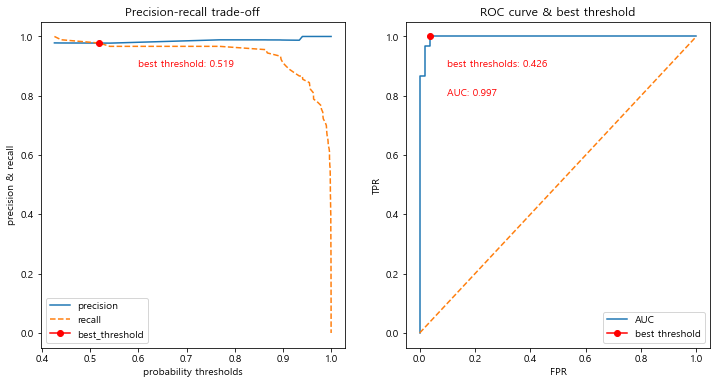

In [7]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# 앞서 적합한 로지스틱 회귀 모델로 예측값, 예측확률값 가져오기
pred = lr.predict(X_test)
prob = lr.predict_proba(X_test)[:, 1] # 1이 될 probability thresholds

# 1) precision-recall의 차이가 최소가 되는 지점 찾기
# precision-recall trade-off
# precision-recall trade-off plot을 통해 Precision과 Recall의 차이가 최소가 되는 cut-off value(0.519)를 확인할 수 있다.
precision, recall, thresholds = precision_recall_curve(y_test, prob)
thresholds = list(thresholds) + [1]
idx = np.argmin(np.abs(precision - recall))
best_threshold = thresholds[idx]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title("Precision-recall trade-off")
ax[0].plot(thresholds, precision, label='precision')
ax[0].plot(thresholds, recall, label='recall', linestyle='dashed')
ax[0].plot(best_threshold, recall[idx], marker='o', color='red', label='best_threshold')
ax[0].text(0.6, 0.9, f"best threshold: {round(best_threshold, 3)}", color='red')
ax[0].legend()
ax[0].set_xlabel('probability thresholds')
ax[0].set_ylabel('precision & recall')

# 2) ROC AUC가 최대가 되는 지점 찾기
# ROC curve & best threshold
# ROC curve plot을 통해 AUC가 최대가 되는 cut-off value(0.426)를 확인할 수 있다.
fpr, tpr, thresholds = roc_curve(y_test, prob)
auc = roc_auc_score(y_test, prob)

# best thresholds(=cut-off value) 찾기
# Youden Index (Youden's J statistic): recall - (1 - specificity)의 최대 지점
J = tpr - fpr
idx = np.argmax(J)

best_threshold = thresholds[idx]
best_tpr = tpr[idx]
best_fpr = fpr[idx]

ax[1].set_title("ROC curve & best threshold")
ax[1].plot(fpr, tpr, label="AUC")
ax[1].plot([0, 1], [0, 1], linestyle='dashed')
ax[1].plot(best_fpr, best_tpr, marker='o', color='red', label='best threshold')
ax[1].text(0.1, 0.9, f"best thresholds: {round(best_threshold, 3)}", color='red')
ax[1].text(0.1, 0.8, f'AUC: {round(auc, 3)}', color='red')
ax[1].legend()
ax[1].set_xlabel("FPR")
ax[1].set_ylabel("TPR")
plt.show()

### 분류 모델의 성능 시각화: lift chart

baseline_lift: 0.63
lift chart:
         pred_prob  y_true  captured_R         R      lift
Decile                                                   
1       13.999467      14    0.155556  0.979021  1.555556
2       13.996522      14    0.155556  0.979021  1.555556
3       13.988619      14    0.155556  0.979021  1.555556
4       13.966385      14    0.155556  0.979021  1.555556
5       13.812808      14    0.155556  0.979021  1.555556
6       13.112845      13    0.144444  0.909091  1.444444
7        6.829995       7    0.077778  0.489510  0.777778
8        0.269139       0    0.000000  0.000000  0.000000
9        0.004845       0    0.000000  0.000000  0.000000
10       0.000003       0    0.000000  0.000000  0.000000 



C:\Users\kimmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


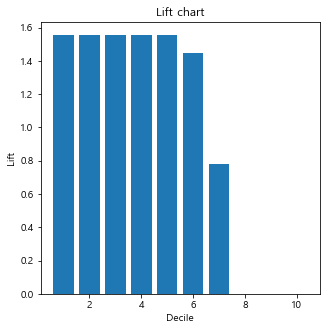

In [8]:
# 예측된 확률과 실제 클래스를 확률 내림차순으로 정렬
rank = pd.DataFrame({
    "pred_prob" : prob,
    "y_true" : y_test
}).sort_values(by="pred_prob", ascending=False).reset_index(drop=True)

# 10개 구간으로 나눔
rank['Decile'] = 10 # 임시로 입력
start = 0
end = len(rank) // 10
end_start = end - start
decile = 1

while end < len(rank):
    for i in range(start, end):
        rank['Decile'][i] = decile
        
    decile += 1
    start = end
    end += len(rank) // 10
    
# baseline lift 계산 및 실구매자수 집계
total = len(y_test) # 전체 데이터 수
count = y_test.sum() # 1(True)의 개수
baseline_lift = count / total
print(f"baseline_lift: {round(baseline_lift, 2)}")

liftchart = rank.groupby('Decile').sum()

# lift chart에 captured response, response, lift 추가
liftchart['captured_R'] = liftchart['y_true'] / count
liftchart['R'] = liftchart['y_true'] / (total / 10) # 10 = 등급수
liftchart['lift'] = liftchart['R'] / baseline_lift
print(f"lift chart:\n", liftchart, "\n")

plt.rcParams['figure.figsize'] = (5, 5)
plt.title("Lift chart")
plt.bar(liftchart.index, liftchart['lift'])
plt.ylabel("Lift")
plt.xlabel("Decile")
plt.show()

### Multi-class 분류 모델의 평가

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

# 데이터 불러오기
load = load_wine()
X = load['data'][:, :5]
y = load['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

# 모델 적합
svm = SVC(C=1, kernel='rbf', gamma='auto', probability=True)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
prob = svm.predict_proba(X_test)[:, 1]

# 모델 평가
titles = ['accuracy', 'precision', 'recall', 'f1_score']
functions = [accuracy_score, precision_score, recall_score, f1_score]

for title, function in zip(titles, functions):
    if function in [precision_score, recall_score, f1_score]:
        params = {'average' : None} # 각 클래스 별 점수 반환을 위한 설정
        score = function(y_test, pred, **params)
    else:
        score = function(y_test, pred)
        
    print(f"{title}: {score.round(2)}")
    
print("\n")
print(f">>> classification report: \n {classification_report(y_test, pred)}")
print(f">>> confusion matrix: \n {pd.DataFrame(confusion_matrix(y_test, pred), index=['실제값(0)', '실제값(1)', '실제값(2)'], columns=['예측값(0)', '예측값(1)', '예측값(2)'])}")

accuracy: 0.82
precision: [0.82 0.81 0.86]
recall: [0.93 0.94 0.5 ]
f1_score: [0.87 0.87 0.63]


>>> classification report: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.81      0.94      0.87        18
           2       0.86      0.50      0.63        12

    accuracy                           0.82        45
   macro avg       0.83      0.79      0.79        45
weighted avg       0.83      0.82      0.81        45

>>> confusion matrix: 
         예측값(0)  예측값(1)  예측값(2)
실제값(0)      14       0       1
실제값(1)       1      17       0
실제값(2)       2       4       6


### Multi-class 분류 모델의 성능 시각화

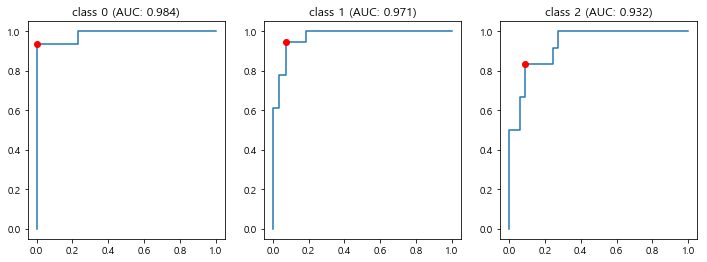

In [10]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_train2 = label_binarize(y_train, classes=np.unique(y_train))
y_test2 = label_binarize(y_test, classes=np.unique(y_test))

ovr_clf = OneVsRestClassifier(svm) # 앞서 적합한 모델 입력
ovr_clf.fit(X_train, y_train2)
prob3 = ovr_clf.predict_proba(X_test)

fprs, tprs, aucs, best_thresholds, best_idx = [], [], [], [], []
for i in range(len(np.unique(y_train))):
    fpr, tpr, thresholds = roc_curve(y_test2[:, i], prob3[:, i])
    idx = np.argmax(tpr - fpr) # 최적의 threshold idx
    best_threshold = thresholds[idx] # 최적의 threshold 값
    auc = roc_auc_score(y_test2[:, i], prob3[:, i])
    
    fprs.append(fpr) # 해당 클래스의 최적값들을 리스트에 추가
    tprs.append(tpr)
    aucs.append(auc)
    
    best_thresholds.append(best_threshold)
    best_idx.append(idx)
    
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.plot(fprs[i], tprs[i], label='ROC curve')
    ax.set_title(f"class {i} (AUC: {round(aucs[i], 3)})")
    ax.plot(fprs[i][best_idx[i]], tprs[i][best_idx[i]], marker='o', color='red')
    
plt.show()

## 11-3. 군집모델 평가 지표
- 실제 군집값이 없는 경우의 군집모델 평가 지표는 다음과 같다.

### Silhouette coefficient
- 군집 내의 응집도와 군집 간 분리도를 이용한 지표로 군집 내 요소 간의 거리가 짧고 서로 다른 군집 간 거리가 멀수록 값이 커진다.
- 완벽한 군집화는 1, 군집화가 전혀 이루어지지 않은 경우 -1을 가진다.
- DBSCAN과 같은 밀도 기반 클러스터링 기법에서 더 높은 점수를 내는 경향이 있다.
- 밀집된 클러스터가 좋긴 하지만 모양이 복잡할 때는 밀집도를 활용한 평가가 잘 들어맞지 않다.
- sklearn.metrics.silhouette_score(X, labels, *[, ...])

### Calinski and Harabasz score (=Variance ratio criterion)
- 클러스터 내 분산과 클러스터 간 분산 간의 비율을 나타낸다.
- 값이 클수록 클러스터들이 조밀하고 잘 분리되었다고 판단한다.
- 계산이 빠르다.
- sklearn.metrics.calinski_harabasz_score(X, labels)

### Davies-Bouldin score
- 가장 유사한 군집이 있는 각 군집의 "평균" 유사성 측정값으로, 유사성은 군집 내 거리와 군집 간 거리의 비율을 나타낸다.
- 이 값이 낮을수록 잘 된 클러스터링으로 본다.
- 최소 score값은 0이다.
- 실루엣 스코어보다 계산이 간단하다.
- 이 스코어는 계산에 있어서 포인트 단위 거리만 사용하므로 데이터세트 고유의 수량과 기능만을 기반으로 한다.
- sklearn.metrics.davies_bouldin_score(X, labels)

- 실제 군집값이 있는 경우의 군집모델 평가 지표는 다음과 같다.

### ARI (Adjusted rand index)
- 무작위로 할당된 군집에 대한 ARI 값은 0에 가까워지며 무작위 할당보다 나쁘게 군집되면 음수값을 가질 수 있다.
- -0.5 ~ 1 사이의 값을 가지며, 잘된 군집은 1에 가깝다.
- sklearn.metrics.adjusted_rand_score(labels_true, labels_pred)

### NMI (Normalized mutual information)
- 0~1 사이의 값을 가지며, 실제 군집값과 예측 군집값의 상호 정보를 확인하여 상호 정보가 없는 독립일 때는 0, 완벽한 상관관계를 가질 때는 1로서 1에 가까울수록 잘된 군집으로 본다.
- 이 측정값은 때때로 조정되지 않기 때문에 ARI가 더 선호되기도 한다.
- sklearn.metrics.normalized_mutual_info_score(labels_true, labels_pred, *, average_method='arithmetic')

### Completeness score (완전성)
- 예측한 군집의 모든 데이터 포인트들이 실제 군집과 동일하게 한 군집을 이룰 때 완전성을 만족한다.
- 0~1 사이 값을 가지며 1에 가까울수록 잘 분리되었다고 본다.
- 측정값은 레이블의 절댓값과 상관없다. 예를 들어 0, 1, 2의 군집을 4, 5, 6으로 예측해도 각 클러스터의 데이터 포인트들만 동일하게 포함되어 있으면 적절한 score를 반환한다.
- 이 metric은 대칭이 아니기 때문에 labels_true와 labels_pred의 순서가 바뀌면 다른 값을 반환하게 된다.
- sklearn.metrics.completeness_score(labels_true, labels_pred)

### Homogeneity score (동질성)
- 예측한 모든 군집들이 실제 군집의 단일 클래스로만 이루어져 있을 때 동질성을 만족한다.
- 0~1 사이 값을 가지며 1에 가까울수록 잘 분리되었다고 본다.
- sklearn.metrics.homogeneity_score(labels_true, labels_pred)

### V-measure
- Homogeneity score와 Completeness score의 조화평균을 의미한다.
- 0~1 사이의 값을 가지며 1에 가까울수록 잘 분리되었다고 본다.
- sklearn.metrics.v_measure_score(labels_true, labels_pred, *, beta=1.0)

### Rand Index (For two clusterings)
- 모든 샘플 쌍을 고려하고, 예측 및 실제 군집에서 동일하거나 다른 군집에 할당된 쌍을 계산함으로써 두 군집 간의 유사성을 계산한다.
- metrics.rand_score(labels_true, labels_pred)

### Mutual Information (For two clusterings)
- 예측 및 실제 군집 간의 상호 정보를 확인하여 두 군집 간의 유사성을 계산한다.
- metrics.mutual_info_score(labels_true, labels_pred, ...)

In [11]:
# 데이터 불러오기
from sklearn.datasets import load_iris

X, target = load_iris()['data'], load_iris()['target']

# K-means clustering 적합
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

cluster = kmeans.predict(X) # 예측 군집

In [12]:
# 실제 군집값이 없는 경우
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

titles = ['silhouette', 'calinski', 'davies']
functions = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
for t, f in zip(titles, functions):
    socre = f(X, cluster)
    print(f"{t}: {score.round(3)}")

silhouette: [0.875 0.872 0.632]
calinski: [0.875 0.872 0.632]
davies: [0.875 0.872 0.632]


In [13]:
# 실제 군집값이 있는 경우
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score, v_measure_score, mutual_info_score, completeness_score, homogeneity_score, v_measure_score, mutual_info_score

titles = ['ARI', 'NMI', 'completeness', 'homogeneity', 'v-measure', 'rand', 'MI']
functions = [adjusted_rand_score, normalized_mutual_info_score, completeness_score, homogeneity_score, v_measure_score, mutual_info_score, completeness_score, homogeneity_score, v_measure_score, mutual_info_score]
for t, f in zip(titles, functions):
    score = f(target, cluster)
    print(f"{t}: {round(score, 3)}")

ARI: 0.73
NMI: 0.758
completeness: 0.765
homogeneity: 0.751
v-measure: 0.758
rand: 0.826
MI: 0.765


## 11-4. 거리 지표
- 연속형 변수의 거리들은 다음과 같다.

### Euclidean distance
- 데이터 간의 유사성을 측정할 때 많이 사용하는 대표적인 거리이다.
- 통계적 개념이 내포되어 있지 않아서 변수들의 산포 정도가 전혀 감안되어 있지 않다.
- $L_2$ distance라고도 한다.
- $d(x, y) = \sqrt{(x_1 - y_1)^2 + ... + (x_p - y_p)^2 }$
- scipy.spatial.distance.euclidean

### 표준화거리 (Standardized Euclidean distnace)
- 해당변수의 표준편차로 척도 변환한 후 유클리드 거리를 계산하는 방법이다.
- 표준화하게 되면 척도의 차이, 분산의 차이로 인한 왜곡을 피할 수 있다.
- scipy.spatial.distance.seuclidean

### Manhattan distance (=Cityblock distance)
- 유클리디안 거리와 함께 가장 많이 사용되는 거리로 맨하탄 도시에서 건물에서 건물을 가기 위해 최단 거리를 구하기 위해 고안된 거리이다.
- $L_1$ distance라고도 한다.
- $d(x, y) = \sum_{i=1}^{p}|x_i-y_i|$
- scipy.spatial.distance.cityblock

### Mahalanobis distance
- 통계적 개념이 포함된 거리이며 변수들의 산포를 고려하여 이를 표준화한 거리이다.
- 두 벡터 사이의 거리를 산포를 의미하는 표본공분산으로 나눠주어야 하며, 그룹에 대한 사전 지식 없이는 표본공분산 S를 계산할 수 없으므로 사용하기 곤란하다.
- $d(x, y) = \sqrt{(x-y)^TS^{-1}(x-y)}$
- $S^{-1}$은 공분산 행렬의 역행렬, T는 변환행렬
- scipy.spatial.distance.mahalanobis(u, v, VI)

### Minkowski distance
- 맨하탄 거리와 유클리드 거리를 한 번에 표현한 거리이다.
- m차원 민코프스키 공간에서의 거리로서 m=1일때 맨하탄 거리와 같고, m=2일 때 유클리드 거리와 같다.
- $d(x, y) = [\sum_{i=1}^{p}|x_i - y_i|^m]^{\frac{1}{m}}$
- scipy.spatial.distance.minkowski

### Canberra distance
- $d(x, y) = \sum_{i=1}^{p} \frac{|x_i - y_i|}{x_i + y_i}$
- scipy.spatial.distance.Canberra

### Chebychev distance
- $d(x, y) = max|x_i - y_i|$
- scipy.spatial.distance.Chebyshev

### 기타
- corrrelation distance: scipy.spatial.distance.correlation
- jensenshannon distance: scipy.spatial.distance.jensenshannon
- Braycurtis distance: scipy.spatial.distance.braycurtis

In [14]:
# 연속형 변수의 거리들
from scipy.spatial.distance import euclidean, seuclidean, cityblock, minkowski, mahalanobis

NV1 = np.array([1, 5, 7, 9])
NV2 = np.array([2, 4, 8, 13])

V = np.array([0.1, 1, 10, 5]) # V = component variacnes (분산)
IV = np.array([[1, 0.5, 0.5, 0.1], [0.1, 2, 1, 0.5], [0.5, 0.5, 1, 0.2], [1, 1, 1, 1]])
# IV = The inverse of the covariance matrix (역공분산)

# 유클리드 거리
eu1 = euclidean(NV1, NV2)
eu2 = np.sqrt(((NV1 - NV2)**2).sum())
print(f"Euclidean distance: {eu1} = {eu2}")

# 표준화 거리
seu1 = seuclidean(NV1, NV2, V)
seu2 = np.sqrt(((NV1 - NV2)**2 / V).sum())
print(f"seuclidean distance: {seu1} = {seu2}")

# 맨해튼 거리
man1 = cityblock(NV1, NV2)
man2 = np.abs(NV1 - NV2).sum()
print(f"Manhattan distance: {man1} = {man2}")

# 민코프스키 거리
p = 1
min1 = minkowski(NV1, NV2, p=1)
min2 = ((np.abs(NV1 - NV2)**p).sum())**1 / p

p = 2
min3 = minkowski(NV1, NV2, p=2)
min4 = np.sqrt(((np.abs(NV1 - NV2))**p).sum())
print(f"minkowski distance(p=1): {min1} = {min2}")
print(f"minkowski distance(p=2): {min3} = {min4}")

# 마할라노비스 거리
mah1 = mahalanobis(NV1, NV2, IV)
mn = len(NV1)

reshaped_mat1 = (NV1 - NV2).reshape(-1, mn) # 형태 변환 (1*4)
result1 = np.dot(reshaped_mat1, IV) # np.dot을 통해 행렬곱을 진행

reshaped_mat2 = (NV1 - NV2).reshape(-mn, 1) # 형태 변환 (4*1)
result2 = np.dot(result1, reshaped_mat2)
mah2 = float(np.sqrt(result2))
print(f"mahalanobis distance: {mah1} = {mah2}")

Euclidean distance: 4.358898943540674 = 4.358898943540674
seuclidean distance: 3.7815340802378077 = 3.7815340802378077
Manhattan distance: 7 = 7
minkowski distance(p=1): 7.0 = 7.0
minkowski distance(p=2): 4.358898943540674 = 4.358898943540674
mahalanobis distance: 4.701063709417263 = 4.701063709417263


- 범주형 변수들의 거리들은 다음과 같다.

### Jaccard distance
- Boolean 속성으로 이루어진 두 개체 간의 거리 측정에 사용된다.
- 한편, (1-자카드 거리)를 자카드 유사도(Jaccard similarity 혹은 Jaccard coefficient)라고 하며, 두 개체 간의 유사도 측정에 사용한다.
- 자카드 유사도는 두 개체가 유사할 수록 1에 가깝고 다를수록 0에 가깝다.
- 자카드 거리 = 1 - 자카드 유사도
- 자카드 유사도 = $\frac{|A \cap B|}{|A \cup B|}$
- scipy.spatial.distance.jaccard

### Cosine distance
- 코사인 거리이다.
- 한편, (1-코사인 거리)를 코사인 유사도(Cosine similairty)라고 하며, 문서를 유사도 기준으로 분류 혹은 그룹핑 할 때 유용하게 사용한다.
- 두 개체의 벡터 내적의 코사인 값을 계산하여 코사인 유사도를 측정한다.
- 코사인 유사도는 서로 같을수록 1, 서로 다를수록 -1의 값을 가진다.
- 코사인 거리 = 1 - 코사인 유사도
- 코사인 유사도: $\frac{A \cdot B}{||A||_2 \cdot ||B||_2}$
- $\cdot$: 같은 인덱스(위치)에 있는 원소들끼리 곱해서 그 값들을 모두 합하라는 의미
- $||A||_2$: $L_2$ 거리 즉, 유클리디안 거리
- scipy.spatial.distance.cosine

### 기타
- Dice dissimilarity: scipy.spatial.distance.dice
- Hamming distance: scipy.spatial.distance.hamming
- Kulsinski dissimialirty: scipy.spatial.distance.kulsinski
- the Rogers-Tanimoto: scipy.spatial.distance.rogerstanimoto

In [15]:
# 범주형 변수의 거리들
from scipy.spatial.distance import jaccard, cosine
from sklearn.metrics import pairwise_distances

# Boolean data 생성
print("[Boolean data]")
bdf = pd.DataFrame({
    "Life" : [1, 1],
    "Life2" : [0, 1],
    "Life3" : [0, 1],
    "Life4" : [0, 1],
    "Love" : [0, 1],
    "Love2" : [0, 1],
    "Love3" : [0, 1],
    "Love4" : [0, 1],
    "Love5" : [0, 1],
    "Love6" : [0, 1],
    "Love7" : [0, 1],
    "Learn" : [1, 1],
    "Learn2" : [1, 1],
    "Learn3" : [1, 1],
    "Learn4" : [1, 0],
    "Learn5" : [1, 0]    
}, index=["doc_1", "doc_2"])

doc_1 = np.array(bdf.loc['doc_1', :])
doc_2 = np.array(bdf.loc['doc_2', :])
bdf

[Boolean data]


,Life,Life2,Life3,Life4,Love,Love2,Love3,Love4,Love5,Love6,Love7,Learn,Learn2,Learn3,Learn4,Learn5
doc_1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
doc_2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [16]:
# 자카드 거리와 자카드 유사도 계산
jac1 = jaccard(doc_1, doc_2) # scipy
jac2 = pairwise_distances(bdf.values, metric='jaccard')[0][1] # sklearn

check = pd.DataFrame(bdf.sum(), columns=['check'])
union = len(check[check['check'] != 0])
intersec = len(check[check['check'] == 2])

jac3 = 1 - intersec / union
print(f"- Jaccard distance: {jac1} = {jac2} = {jac3}")
print(f"- Jaccard similarity: {1-jac1} = {1-jac2} = {1-jac3}")

- Jaccard distance: 0.75 = 0.75 = 0.75
- Jaccard similarity: 0.25 = 0.25 = 0.25


C:\Users\kimmi\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [17]:
# Frequency data 생성
print(f"[Frequency data]")
fdf = pd.DataFrame({
    "Life" : [1, 4],
    "Love" : [0, 7],
    "Learn" : [5, 3]
}, index=['doc1', 'doc2'])

doc1 = np.array(fdf.loc['doc1', :])
doc2 = np.array(fdf.loc['doc2', :])
fdf

[Frequency data]


,Life,Love,Learn
doc1,1,0,5
doc2,4,7,3


In [18]:
# 코사인 거리와 코사인 유사도 계산
cos1 = cosine(doc_1, doc_2) # scipy
cos2 = pairwise_distances(fdf.values, metric='cosine')[0][1] # sklearn

cossim = np.sum(doc1 * doc2) / ((np.sqrt(np.sum((doc1)**2))) * np.sqrt(np.sum((doc2)**2)))
cos3 = 1 - cossim
print(f"- Cosine distance: {cos1} = {cos2} = {cos3}")
print(f"- Cosine similarity: {1-cos1} = {1-cos2} = {1-cos3}")

- Cosine distance: 0.5635642195280153 = 0.5668372850418244 = 0.5668372850418244
- Cosine similarity: 0.4364357804719847 = 0.4331627149581756 = 0.4331627149581756


## 연습문제

#### 1.
- 다음과 같은 데이터로 'price'를 예측하는 모델을 생성한다면, 어떤 평가지표로 평가할 수 있는지 3개 이상의 평가지표를 예를 들어 설명하시오.

In [19]:
realestate = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv")
realestate.head(3)

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super,0,3,1056.0,2,1,39.07
1,Plot,1,6,2600.0,5,3,120.00
2,Super,1,5,1521.0,3,1,95.00


In [20]:
# 해당 데이터로 'price'를 예측하는 회귀 모델을 생성하는 경우 사용할 수 있는 평가지표는 결정계수, MSE, MAPE 등이 있다.
# 결정계수는 데이터에 대한 설명력을 0~1로 표현할 수 있는데 그 값이 1에 가까울수록 해당 모델이 학습 데이터를 잘 설명한다고 볼 수 있다.

# 또 다른 평가지표로 MSE, Mean Sqaured Error가 있다. 이는 실제값과 예측값의 차이를 제곱해 평균을 계산한 것이다.
# 지표는 직관적이지만 예측 변수와 단위가 다르고, 이상치에 민감하다는 단점이 있다.

# MAPE는 MAE를 퍼센트로 변환한 것으로서 예측값 대비 잔차의 비율을 의미한다.
# 지표가 직관적이고 비율 변수이기 때문에 모델 간 성능을 비교하기 용이하다.
# 한편, 비율로 해석이 의미있는 값에만 적용할 수 있고, 실제 값에 0이 포함될 경우 MAPE를 계산할 수 없다는 한계가 있다.

#### 2.
- 다음과 같은 데이터로 'CUST_ID'를 적절한 군집으로 할당하는 모델을 생성한다면, 어떤 평가 지표로 평가할 수 있는지 2개 이상의 평가지표를 예를 들어 설명하시오.

In [21]:
df = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice10_credit_card.csv")
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
0,C10001,40.900749,0.818182,95.40,0.166667,2
1,C10002,3202.467416,0.909091,0.00,0.000000,0
2,C10003,2495.148862,1.000000,773.17,1.000000,12


In [22]:
# 해당 데이터로 군집 모델을 생성하는 경우 사용할 수 있는 평가 지표는 실제 군집값이 없는 경우이기 때문에 실루엣 계수와 
# Calinski and Harabasz score를 들 수 있다. 실루엣 계수는 군집 내의 응집도가 높고, 군집 간 분리도가 높을 수록 잘된 군집으로 1에 가까운
# 값을 나타내고, 군집이 전혀 이루어지지 않은 경우 -1에 가까운 값을 나타낸다. Calinski and Harabasz score는 클러스터 내 분산과
# 클러스터 간 분산 간의 비율을 나타내는데, 값이 클수록 클러스터들이 조밀하고 잘 분리되었다고 판단한다.

#### 3.
- 다음과 같은 데이터 '문서1'과 '문서2'의 유사성을 판단할 때 어떤 거리 지표를 사용해야 하는지 설명하시오,

In [23]:
table = pd.DataFrame([[0,1,0,1,0,0,0,0], [1,1,0,1,0,0,1,1]], index=['문서1', '문서2'], columns=['a', 'hello', 'one', 'is', 'temperature', 'you', 'I', 'banana'])
table

,a,hello,one,is,temperature,you,I,banana
문서1,0,1,0,1,0,0,0,0
문서2,1,1,0,1,0,0,1,1


In [24]:
# 해당 데이터와 같이 Boolean 속성으로 이루어진 두 개체 간의 거리를 측정할 때에는 자카드 거리(1-자카드 유사도)를 사용할 수 있다.